In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn import tree
import dtreeviz
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

In [3]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.00,0,1,0,25.19,6.60,140,0
1,1,20.00,0,0,0,27.32,6.60,85,0
2,1,44.00,0,0,0,19.31,6.50,200,1
3,1,32.00,0,0,0,27.32,5.00,100,0
4,1,53.00,0,0,0,27.32,6.10,85,0
...,...,...,...,...,...,...,...,...,...
44373,0,67.00,0,0,1,27.32,6.80,220,1
44374,0,43.00,0,0,1,31.35,3.50,100,0
44375,0,44.00,0,0,1,27.32,5.00,158,0
44376,0,13.00,0,0,1,21.81,4.80,90,0


In [4]:
df.head()

,gender,age,hypertension,heart_disease,smoking,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.00,0,1,0,25.19,6.60,140,0
1,1,20.00,0,0,0,27.32,6.60,85,0
2,1,44.00,0,0,0,19.31,6.50,200,1
3,1,32.00,0,0,0,27.32,5.00,100,0
4,1,53.00,0,0,0,27.32,6.10,85,0


In [5]:
duplicate_rows_data = df[df.duplicated()]
duplicate_rows_data

,gender,age,hypertension,heart_disease,smoking,bmi,HbA1c_level,blood_glucose_level,diabetes
952,1,80.00,0,0,0,27.32,5.70,85,0
1171,1,36.00,0,0,0,27.32,4.80,155,0
1271,1,55.00,0,0,0,27.32,6.50,90,0
1392,1,31.00,0,0,0,27.32,5.80,100,0
2179,1,80.00,0,0,0,27.32,4.80,80,0
...,...,...,...,...,...,...,...,...,...
43877,0,47.00,0,0,1,27.32,4.50,155,0
43961,0,29.00,0,0,1,27.32,6.00,90,0
44008,0,45.00,0,0,1,27.32,6.10,126,0
44122,0,51.00,0,0,1,27.32,4.00,158,0


In [6]:
df = df.drop_duplicates()
df

,gender,age,hypertension,heart_disease,smoking,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.00,0,1,0,25.19,6.60,140,0
1,1,20.00,0,0,0,27.32,6.60,85,0
2,1,44.00,0,0,0,19.31,6.50,200,1
3,1,32.00,0,0,0,27.32,5.00,100,0
4,1,53.00,0,0,0,27.32,6.10,85,0
...,...,...,...,...,...,...,...,...,...
44373,0,67.00,0,0,1,27.32,6.80,220,1
44374,0,43.00,0,0,1,31.35,3.50,100,0
44375,0,44.00,0,0,1,27.32,5.00,158,0
44376,0,13.00,0,0,1,21.81,4.80,90,0


In [7]:
df.shape

(43592, 9)

In [8]:
#loop on each column and print distinct valu count
for col in df.columns:
    print(f'{col} : {df[col].nunique()} distinct values')


gender : 2 distinct values
age : 101 distinct values
hypertension : 2 distinct values
heart_disease : 2 distinct values
smoking : 2 distinct values
bmi : 3700 distinct values
HbA1c_level : 18 distinct values
blood_glucose_level : 18 distinct values
diabetes : 2 distinct values


In [9]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking                0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Text(0.5, 1.0, 'Age Distribution')

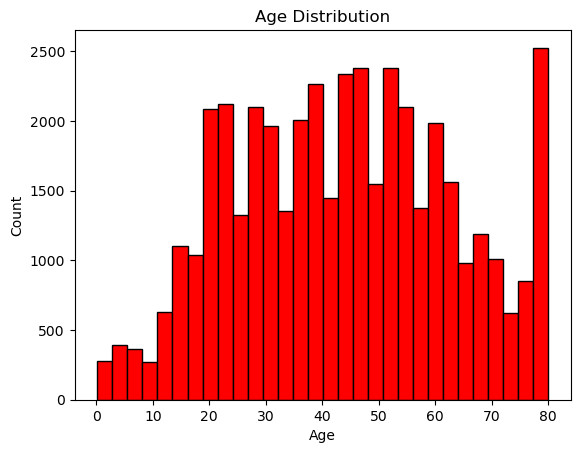

In [10]:
#histogram for age
plt.hist(df['age'],bins=30,edgecolor='black',color='red')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

Text(0.5, 1.0, 'Gender Distribution')

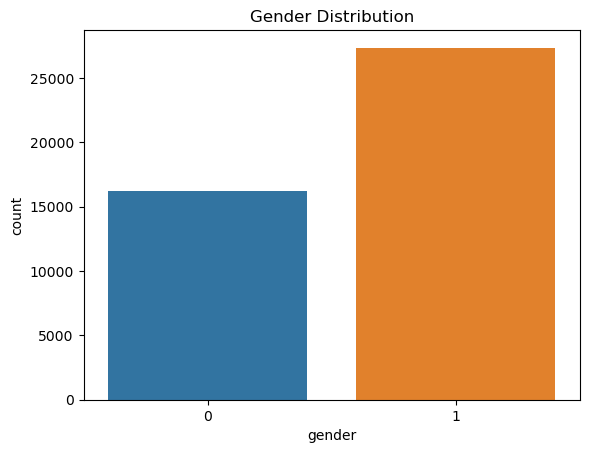

In [11]:
sns.countplot(x='gender',data=df)
plt.title('Gender Distribution')


Text(0.5, 1.0, 'BMI Distribution')

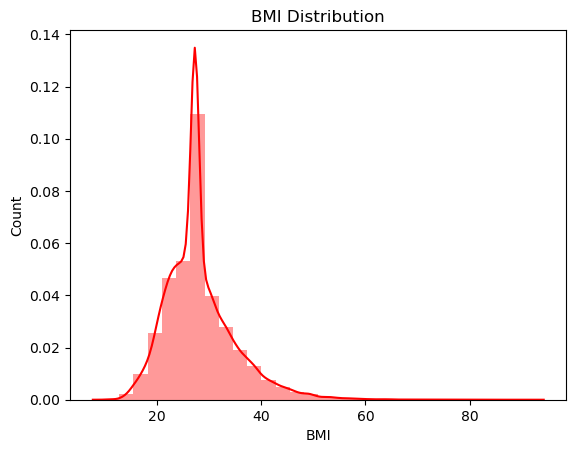

In [12]:
sns.distplot(df['bmi'],bins=30,color='red')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('BMI Distribution')

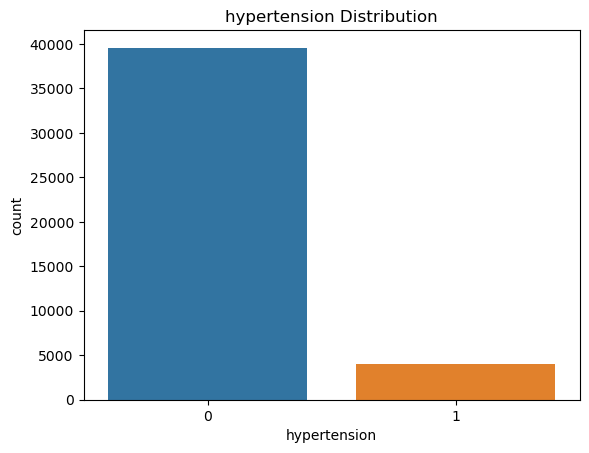

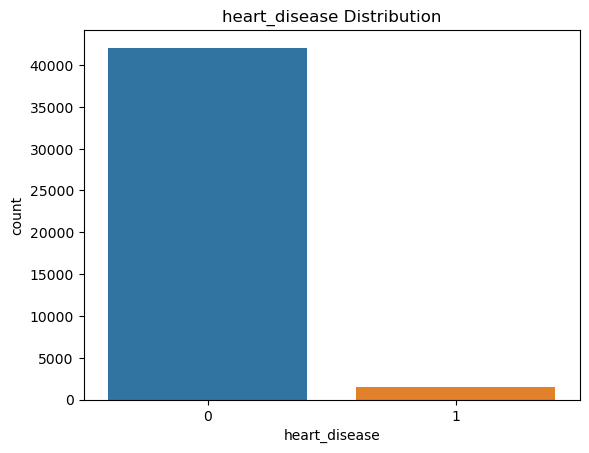

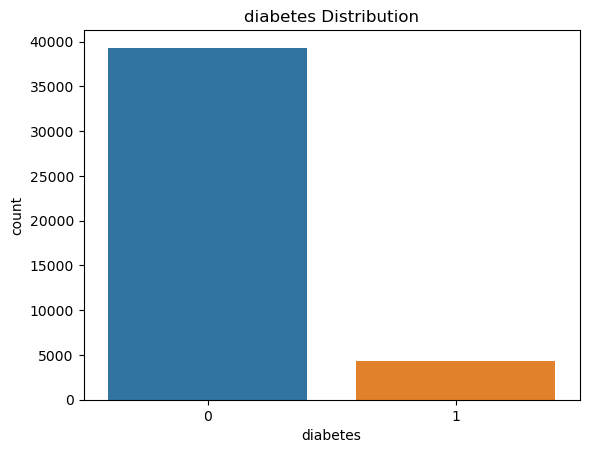

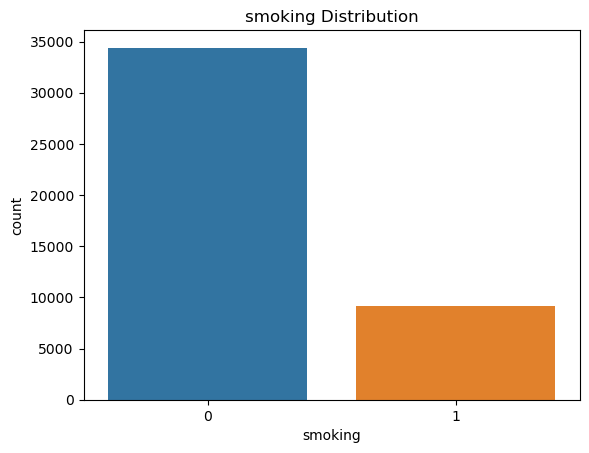

In [13]:
for col in ['hypertension','heart_disease','diabetes','smoking']:
    sns.countplot(x=col,data=df)
    plt.title(f'{col} Distribution')
    plt.show()

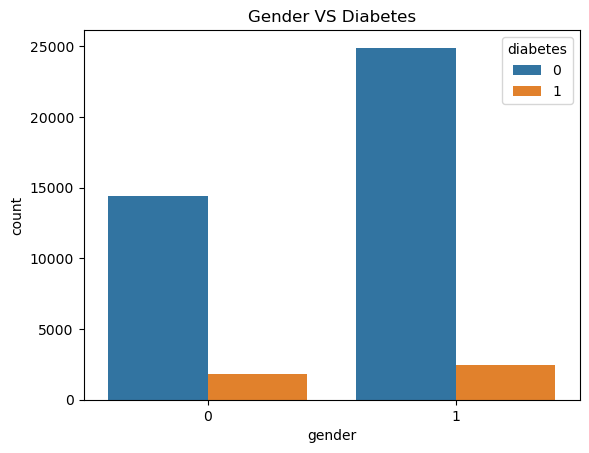

In [14]:
sns.countplot(x='gender',data=df,hue='diabetes')
plt.title('Gender VS Diabetes')
plt.show()

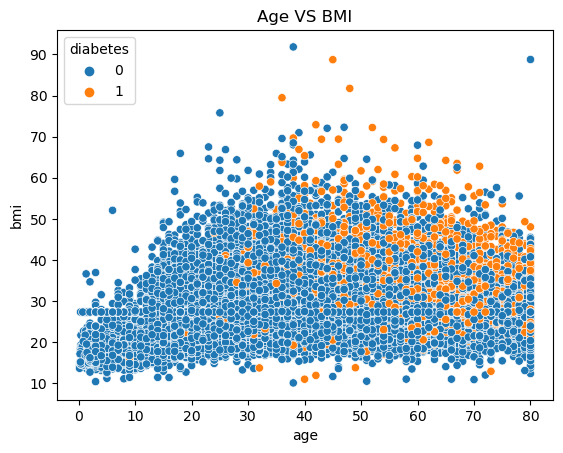

In [15]:
# scatter plot Age VS BMI
sns.scatterplot(x='age',y='bmi',data=df,hue='diabetes')
plt.title('Age VS BMI')
plt.show()

In [16]:
df

,gender,age,hypertension,heart_disease,smoking,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.00,0,1,0,25.19,6.60,140,0
1,1,20.00,0,0,0,27.32,6.60,85,0
2,1,44.00,0,0,0,19.31,6.50,200,1
3,1,32.00,0,0,0,27.32,5.00,100,0
4,1,53.00,0,0,0,27.32,6.10,85,0
...,...,...,...,...,...,...,...,...,...
44373,0,67.00,0,0,1,27.32,6.80,220,1
44374,0,43.00,0,0,1,31.35,3.50,100,0
44375,0,44.00,0,0,1,27.32,5.00,158,0
44376,0,13.00,0,0,1,21.81,4.80,90,0


In [17]:
# Split the data into teachers and target variables
x = df.drop('diabetes',axis=1)
y = df['diabetes']


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)
x_train

,gender,age,hypertension,heart_disease,smoking,bmi,HbA1c_level,blood_glucose_level
34141,0,57.00,0,1,0,32.72,3.50,130
26900,0,58.00,1,0,0,35.28,6.50,90
22505,1,18.00,0,0,0,25.18,6.50,145
17593,1,70.00,0,0,0,20.78,5.80,140
4665,1,49.00,1,0,0,33.50,6.10,200
...,...,...,...,...,...,...,...,...
11697,1,46.00,0,0,0,29.94,6.20,85
28190,0,5.00,0,0,0,15.98,6.20,126
14751,1,39.00,0,0,0,22.61,6.10,90
31328,0,80.00,0,0,0,27.32,4.80,100


In [19]:
y_train

34141    0
26900    0
22505    0
17593    0
4665     0
        ..
11697    0
28190    0
14751    0
31328    0
11756    0
Name: diabetes, Length: 34873, dtype: int64

In [20]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [21]:
# Check for the accuracy score
rfc_train = rfc.predict(x_train)
print(f'Accuracy Score of Training Data : {accuracy_score(rfc_train,y_train)}')

Accuracy Score of Training Data : 0.9993978149284547


In [22]:
prediction = rfc.predict(x_test)
print(f'Accuracy Score of Testing Data : {accuracy_score(prediction,y_test)}')

Accuracy Score of Testing Data : 0.9659364606032802


# Confusion Matrix on Prediction And Test Data

In [23]:
# Confusion Matrix on Prediction And Test Data
cm = confusion_matrix(prediction,y_test)
cm


array([[7834,  262],
       [  35,  588]], dtype=int64)

In [24]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7869
           1       0.94      0.69      0.80       850

    accuracy                           0.97      8719
   macro avg       0.96      0.84      0.89      8719
weighted avg       0.97      0.97      0.96      8719



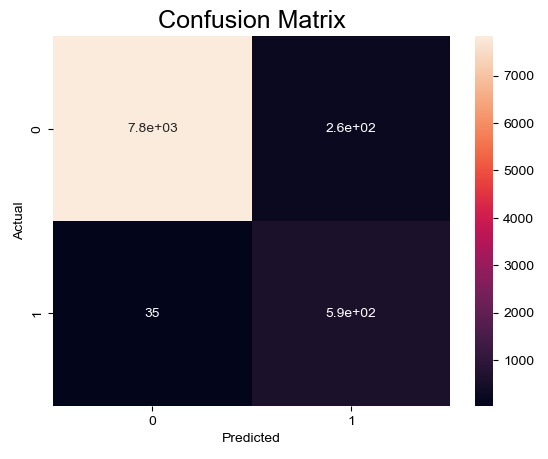

In [25]:
sns.heatmap(cm,annot=True)
sns.set(font_scale=1.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [26]:
# Saving Model
import pickle
saved_model = pickle.dumps(rfc)
rfc_from_pickle = pickle.loads(saved_model)
rfc_from_pickle.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
rfc_from_pickle.predict([[1,60,0,0,0,26.93,5.7,140]])

array([1], dtype=int64)